In [11]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer with 32 filters and 3x3 kernel
model.add(MaxPooling2D((2, 2)))  # Max pooling layer with 2x2 pool size
model.add(Flatten())  # Flatten the output for the fully connected layers
model.add(Dense(10, activation='softmax'))  # Fully connected layer with 10 neurons for 10 classes and softmax activation



In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Load the example MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape the input data to match the CNN input shape
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255  # Normalize the pixel values to the range of 0-1
x_test = x_test.astype('float32') / 255
y_train = np.eye(10)[y_train]  # Convert the target labels to one-hot encoded vectors
y_test = np.eye(10)[y_test]

In [22]:
# Train the model
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Need 10 or more epoch learn Better and better

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0909 - val_accuracy: 0.9839
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0986 - val_accuracy: 0.9825
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0956 - val_accuracy: 0.9834
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.1019 - val_accuracy: 0.9829
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.1016 - val_accuracy: 0.9833
Epoch 6/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1042 - val_accuracy: 0.9827
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1014 - val_ac

1/1 [==============================] - 0s 19ms/step


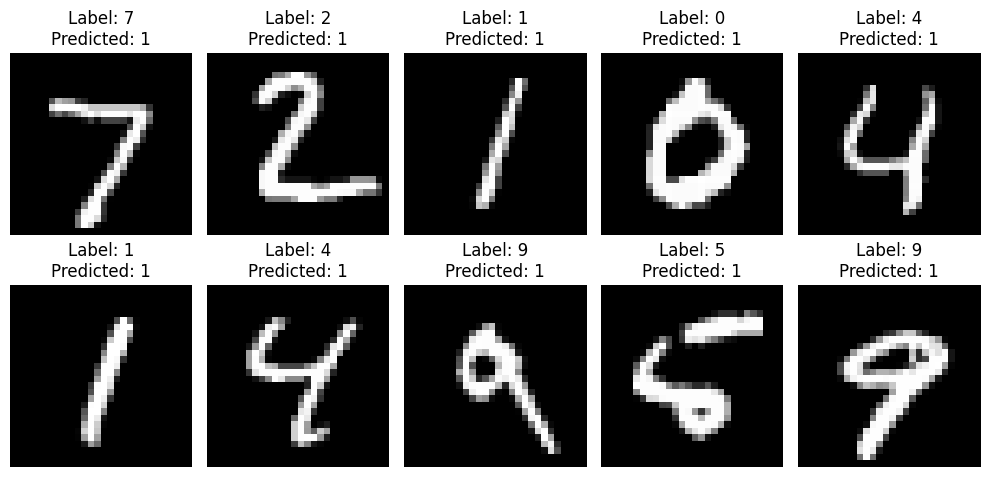

In [24]:
# Make predictions on a new dataset
# Load the new dataset
new_data = np.random.rand(20, 28, 28, 1)  # Example: Randomly generated 10 images

# Preprocess the new data
new_data = new_data.astype('float32') / 255

# Make predictions
predictions = model.predict(new_data)

# Print the predicted class labels and display the original MNIST images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    # Display the original MNIST image
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {np.argmax(y_test[i])}\nPredicted: {np.argmax(predictions[i])}")

plt.tight_layout()
plt.show()

